<a href="https://colab.research.google.com/github/SAIKUMAR918/Machine-learning-Mini-projects/blob/main/Clustering_on_cereals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING**

##**Business Objective:** A Companies CEO wants to supply food which contains all nutritions in it, so he wants different food clusters.

## Computing Distances

In [1]:
# loading the modules 
import numpy as np 
import pandas as pd 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# create two lists
a = [1,2,3]
b = [2,4,6]

In [5]:
# Loading the distance module from scipy 
from scipy.spatial import distance

In [6]:
# Distance Metric Euclidean for 2 lists created
distance.euclidean(a,b)

3.7416573867739413

In [7]:
# Display distance between a and b and corresponding Euclidean distance
print('distance between {} and {} is {}'.format(a,b,distance.euclidean(a,b)))

distance between [1, 2, 3] and [2, 4, 6] is 3.7416573867739413


In [8]:
X = [(2,3,4),(1,5,6),(0,0,0),(4,5,10,12),(1,0,5,7,9),(2,2,2),(1,-2,3)] 
Y = [(5,6,7),(1,2,3),(0,5,6),(5,7,9,11),(4,5,9,13,7),(2,2,2),(5,4,1)]

In [9]:
 # writing a function to compute the distances 
def dist_eu(a,b):
    i= 0 
    dist_list = []
    for i in range(len(a)):
        ed = round(distance.euclidean(a[i] , b[i]),3)
        md = round(distance.cityblock(a[i] , b[i]),3)
        mk = distance.minkowski(a[i], b[i], p=3)
        #dist_list.append([ed,md,mk])
        print('Euclidean between {} and {} is {} units '.format(a[i] , b[i] , ed))
        print('Manhattan distance between {} and {} is {} units '.format(a[i] , b[i] , md))
        print('Minkowski distance between {} and {} is {} units '.format(a[i] , b[i] , mk))
        print('-------\n')
        

In [10]:
# applying it on lists 
dist_eu(X,Y)

Euclidean between (2, 3, 4) and (5, 6, 7) is 5.196 units 
Manhattan distance between (2, 3, 4) and (5, 6, 7) is 9 units 
Minkowski distance between (2, 3, 4) and (5, 6, 7) is 4.3267487109222245 units 
-------

Euclidean between (1, 5, 6) and (1, 2, 3) is 4.243 units 
Manhattan distance between (1, 5, 6) and (1, 2, 3) is 6 units 
Minkowski distance between (1, 5, 6) and (1, 2, 3) is 3.7797631496846193 units 
-------

Euclidean between (0, 0, 0) and (0, 5, 6) is 7.81 units 
Manhattan distance between (0, 0, 0) and (0, 5, 6) is 11 units 
Minkowski distance between (0, 0, 0) and (0, 5, 6) is 6.986368027818105 units 
-------

Euclidean between (4, 5, 10, 12) and (5, 7, 9, 11) is 2.646 units 
Manhattan distance between (4, 5, 10, 12) and (5, 7, 9, 11) is 5 units 
Minkowski distance between (4, 5, 10, 12) and (5, 7, 9, 11) is 2.2239800905693152 units 
-------

Euclidean between (1, 0, 5, 7, 9) and (4, 5, 9, 13, 7) is 9.487 units 
Manhattan distance between (1, 0, 5, 7, 9) and (4, 5, 9, 13, 7)

## Clustering on Cereals Data

In [11]:
# load the data Cereals.csv
cereals = pd.read_csv('/content/drive/MyDrive/Clustering/Cereals.csv')

In [12]:
# Check how many rows and columns 
cereals.shape

(77, 14)

In [13]:
# Copy the cereals to a variable called data
data = cereals.copy()

In [14]:
# check the head of the cereals 
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [15]:
# droping few variables ['shelf','cups','rating']
cereals.drop(['shelf','cups','rating'] , axis=1 , inplace=True)

# Display 10 samples
cereals.sample(10)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight
60,Raisin_Squares,90,2,0,0,2.0,15.0,6.0,110.0,25,1.00
37,Honey-comb,110,1,0,180,0.0,14.0,11.0,35.0,25,1.00
28,Fruitful_Bran,120,3,0,240,5.0,14.0,12.0,190.0,25,1.33
19,Cracklin'_Oat_Bran,110,3,3,140,4.0,10.0,7.0,160.0,25,1.00
26,Frosted_Mini-Wheats,100,3,0,0,3.0,14.0,7.0,100.0,25,1.00
49,Nutri-Grain_Almond-Raisin,140,3,2,220,3.0,21.0,7.0,130.0,25,1.33
48,Nut&Honey_Crunch,120,2,1,190,0.0,15.0,9.0,40.0,25,1.00
35,Honey_Graham_Ohs,120,1,2,220,1.0,12.0,11.0,45.0,25,1.00
34,Great_Grains_Pecan,120,3,3,75,3.0,13.0,4.0,100.0,25,1.00
76,Wheaties_Honey_Gold,110,2,1,200,1.0,16.0,8.0,60.0,25,1.00


In [16]:
# remove the name from the data but before that let us store into pd series 

# storing name seprately
labels = cereals['name']  

# dropping name from the data frame
cereals.drop(['name'], axis = 1, inplace = True)  

In [17]:
# checking the missing values 
cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
dtype: int64

In [18]:
# Display Summary Statistics
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000


### Handling Missing Values 

In [19]:
# Load the modules required to handle the missing values 
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')

# computes the median values and stores it 
median_imputer.fit(cereals) 

SimpleImputer(strategy='median')

In [20]:
# apply the missing value imputation method on cereals data and convert into data frame
cereals = pd.DataFrame(median_imputer.transform(cereals), columns=cereals.columns)

In [21]:
# check if we still have missing vaules 
cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
dtype: int64

## Standardization

In [22]:
# load the methods to standardize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cereals)

StandardScaler()

In [23]:
# Convert the standardize the data into data frame 
cereals_std = pd.DataFrame(scaler.fit_transform(cereals), columns=cereals.columns)
cereals_std.sample(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight
25,0.161019,-1.420902,-1.013072,0.484170,-0.486498,-0.207111,0.919612,-1.063767,-0.14627,-0.198067
68,-0.872189,-0.501495,-1.013072,-1.737087,0.358155,0.052199,-0.468822,-0.122272,-0.14627,-0.198067
14,0.161019,-1.420902,-0.012988,0.244034,-0.908824,-0.725729,1.382423,-0.629231,-0.14627,-0.198067
52,0.677623,0.417912,-0.012988,0.484170,1.625134,-0.985038,1.613828,2.340099,-0.14627,2.009342
42,0.161019,-0.501495,-0.012988,0.244034,-0.908824,-0.725729,1.151017,-0.629231,-0.14627,-0.198067
21,0.161019,-0.501495,-1.013072,0.724306,-0.486498,1.608054,-0.931633,-0.991344,-0.14627,-0.198067
70,1.710832,0.417912,-0.012988,0.364102,0.780481,0.052199,1.613828,1.905563,3.23257,3.146493
1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.762966,0.225395,0.529532,-1.27255,-0.198067
2,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.022275,-0.468822,3.209172,-0.14627,-0.198067
63,-1.388793,-0.501495,-1.013072,-1.917189,0.358155,0.311508,-1.625849,-0.049849,-1.27255,-1.335218


In [24]:
# Display Summary Statistics
cereals_std.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-8.398765e-17,2.018587e-17,8.583502e-17,5.767392e-18,9.155735e-17,-2.076261e-16,-6.524363e-17,1.009294e-17,2.883696e-17,-1.881612e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.540894e+00,-1.625849e+00,-1.208612e+00,-1.272550e+00,-3.542628e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.257291e-01,-9.316327e-01,-7.740763e-01,-1.462701e-01,-1.980675e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-7.745601e-02,-6.010534e-03,-1.222721e-01,-1.462701e-01,-1.980675e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.708171e-01,9.196117e-01,3.122641e-01,-1.462701e-01,-1.980675e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.126673e+00,1.845234e+00,3.354017e+00,3.232570e+00,3.146493e+00


## Hierarchical Clustering - Dendrogram

In [25]:
# Load the modules required for Hierarchical clustering
from scipy.cluster.hierarchy import linkage , dendrogram
import matplotlib.pyplot as plt

In [26]:
# Constructing the linkage matrix 
linkage_matrix =linkage(cereals_std, method = 'single' , metric='cityblock')

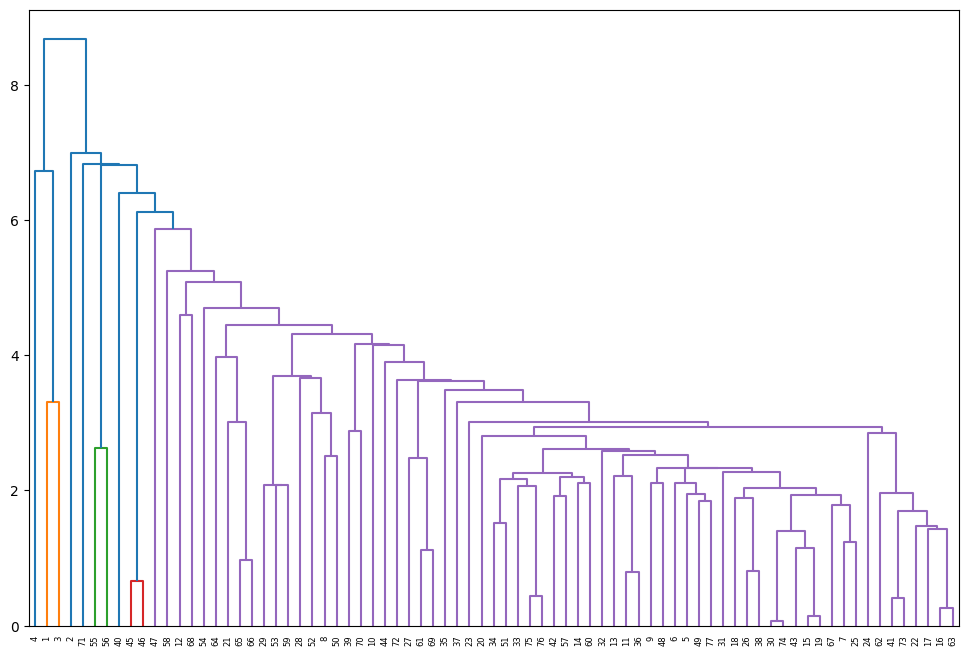

In [27]:
# Constructing the dendrogram and visualizing the dendrogram
labelList = range(1,cereals_std.shape[0]+1) 
plt.figure(figsize=(12,8))
dendrogram(linkage_matrix, labels=labelList)
plt.show()

## Hierarchical Clustering - Agglomerative Clustering

In [28]:
# loading the Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


In [29]:
# Buiding Agglomerative Clustering 
clust = AgglomerativeClustering(n_clusters = 6,
                                affinity = 'euclidean',
                                linkage = 'ward')


In [30]:
# applying on the cereals data 
cluster_predictions = clust.fit_predict(cereals_std)
cluster_predictions

array([3, 2, 3, 3, 5, 5, 5, 4, 0, 0, 5, 0, 5, 2, 5, 0, 0, 5, 5, 2, 1, 0,
       5, 0, 5, 5, 1, 4, 4, 5, 5, 5, 2, 0, 2, 5, 5, 5, 0, 4, 0, 2, 5, 2,
       2, 2, 4, 0, 5, 4, 0, 4, 4, 0, 1, 1, 2, 2, 4, 2, 1, 0, 0, 1, 1, 1,
       5, 0, 1, 0, 4, 0, 0, 5, 0, 0, 5])

In [31]:
data['H_Cluster'] = cluster_predictions

In [32]:
# Create data frame combining the labels and Clusters together 
result = pd.DataFrame({'Lables':labels,'Cluster':cluster_predictions})
result.sample(10)

,Lables,Cluster
39,Just_Right_Fruit_&_Nut,4
7,Basic_4,4
16,Corn_Flakes,0
21,Crispix,0
73,Trix,5
33,Grape-Nuts,0
46,Mueslix_Crispy_Blend,4
52,Post_Nat._Raisin_Bran,4
17,Corn_Pops,5
59,Raisin_Nut_Bran,2


In [33]:
data.head(10)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,H_Cluster
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973,3
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679,2
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505,3
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912,3
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843,5
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541,5
6,Apple_Jacks,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094,5
7,Basic_4,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562,4
8,Bran_Chex,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253,0
9,Bran_Flakes,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813,0


In [34]:
data.groupby('H_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
H_Cluster,,,,,,,,,,,,,
0,110.0,2.0,0.0,220.0,1.0,18.0,3.0,60.0,25.0,2.0,1.00,1.00,45.863324
1,90.0,2.0,0.0,0.0,3.0,15.0,0.0,97.5,0.0,2.0,1.00,1.00,63.005645
2,105.0,3.5,2.0,137.5,2.6,13.0,7.0,110.0,25.0,3.0,1.00,0.67,42.888423
3,70.0,4.0,1.0,140.0,10.0,7.0,5.0,320.0,25.0,3.0,1.00,0.33,68.402973
4,130.0,3.0,1.5,195.0,3.5,14.5,11.0,175.0,25.0,3.0,1.33,0.67,37.439578
5,110.0,1.5,1.0,180.0,0.5,12.0,11.5,40.0,25.0,2.0,1.00,0.75,29.716913


In [35]:
# viewing all the cluster membership at one go
result.Cluster.values

array([3, 2, 3, 3, 5, 5, 5, 4, 0, 0, 5, 0, 5, 2, 5, 0, 0, 5, 5, 2, 1, 0,
       5, 0, 5, 5, 1, 4, 4, 5, 5, 5, 2, 0, 2, 5, 5, 5, 0, 4, 0, 2, 5, 2,
       2, 2, 4, 0, 5, 4, 0, 4, 4, 0, 1, 1, 2, 2, 4, 2, 1, 0, 0, 1, 1, 1,
       5, 0, 1, 0, 4, 0, 0, 5, 0, 0, 5])

## K-means Clustering

In [36]:
# Load the module for kmeans from sklearn 
from sklearn.cluster import KMeans

In [37]:
# apply it on our data 
km = KMeans(n_clusters=2)
km.fit(cereals_std)

KMeans(n_clusters=2)

In [38]:
# Look at the within ss
km.inertia_

623.5212789361394

In [39]:
# For loop to know the suitable k 
wss = {}
for k in range(2,25):
    km = KMeans(n_clusters=k)
    km.fit(cereals_std)
    wss[k] = km.inertia_

In [40]:
# Cluster keys from wss 
wss.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [41]:
# within ss for each cluster values 
wss.values()

dict_values([623.638183415566, 530.9502743898014, 432.60108627418936, 357.07120897137304, 308.15511664966175, 265.06986410012337, 226.404993139608, 196.23440391453326, 183.46140272254354, 171.1333015301447, 152.29007467613087, 136.41504242914658, 131.09442737977136, 121.5834341320453, 106.23857482022996, 104.09776239931611, 93.19437888914725, 86.79695610033455, 81.49852300391065, 79.4890683610685, 72.53705255785064, 71.29227511818976, 64.16187023674138])

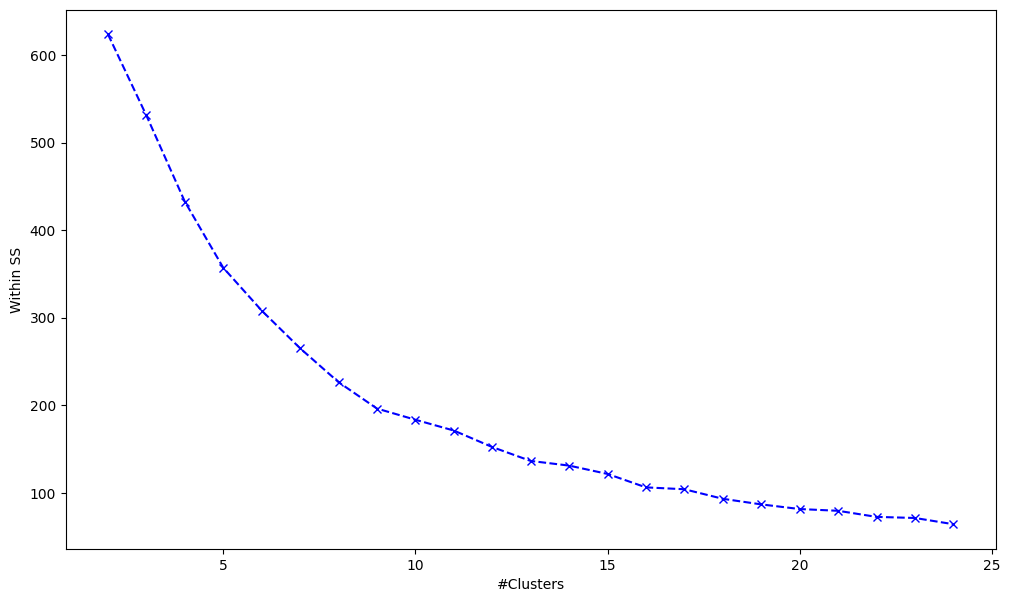

In [42]:
# plotting the withinss 
plt.figure(figsize = (12,7))
plt.plot(list(wss.keys()), list(wss.values()), 'bx--')
plt.xlabel('#Clusters')
plt.ylabel('Within SS')
plt.show()

In [43]:
# Building the K-means with x number of Clusters
km  = KMeans(n_clusters= 6 , random_state = 4545 , n_init = 50)
km.fit(cereals_std)

KMeans(n_clusters=6, n_init=50, random_state=4545)

In [44]:
# Applying the Kmeans on the cereals data with the x cluster
kmeans_clusters = km.predict(cereals_std)

In [45]:
result = pd.DataFrame({'Label':labels,'KMeans_Cluster':kmeans_clusters})
result.sample(10)

,Label,KMeans_Cluster
45,"Muesli_Raisins,_Peaches,_&_Pecans",1
58,Raisin_Bran,2
37,Honey-comb,0
29,Fruity_Pebbles,0
70,Total_Raisin_Bran,2
73,Trix,0
15,Corn_Chex,4
2,All-Bran,5
33,Grape-Nuts,4
20,Cream_of_Wheat_(Quick),3


In [46]:
### Add Cluster Labels to Original Data and get cluster chracteristics
data['KMeans_Cluster'] = result['KMeans_Cluster']

In [47]:
# Check the median for each variable w.r.to each cluster
data.drop(['H_Cluster','rating'],axis=1).groupby('KMeans_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
KMeans_Cluster,,,,,,,,,,,,
0,110.0,1.5,1.0,180.0,0.5,12.0,11.5,40.0,25.0,2.0,1.00,0.75
1,110.0,4.0,2.0,140.0,2.5,13.0,7.0,110.0,25.0,3.0,1.00,0.67
2,130.0,3.0,1.5,195.0,3.5,14.5,11.0,175.0,25.0,3.0,1.33,0.67
3,90.0,2.5,0.0,0.0,2.5,15.5,0.0,95.0,0.0,2.0,1.00,1.00
4,100.0,2.0,0.0,220.0,1.0,18.0,3.0,60.0,25.0,3.0,1.00,1.00
5,70.0,4.0,1.0,140.0,10.0,7.0,5.0,320.0,25.0,3.0,1.00,0.33


* Outliers will influence the results 
* Hierarchical clustering the distances are computed only once 
* K-Means Clustering the cluster membership changes with initial cluster seeds 

## DBScan

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [49]:
model=DBSCAN(eps=2,min_samples=2).fit(cereals_std)
clusters=pd.DataFrame(model.labels_,columns=['clusters'])


In [50]:
### Add Cluster Labels to Original Data and get cluster chracteristics
data['DBSCAN_Cluster'] = clusters['clusters']

In [51]:
# Check the median for each variable w.r.to each cluster
data.drop(['DBSCAN_Cluster','KMeans_Cluster','rating','shelf', 'weight','cups'],axis=1).groupby('H_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
H_Cluster,,,,,,,,,
0,110.0,2.0,0.0,220.0,1.0,18.0,3.0,60.0,25.0
1,90.0,2.0,0.0,0.0,3.0,15.0,0.0,97.5,0.0
2,105.0,3.5,2.0,137.5,2.6,13.0,7.0,110.0,25.0
3,70.0,4.0,1.0,140.0,10.0,7.0,5.0,320.0,25.0
4,130.0,3.0,1.5,195.0,3.5,14.5,11.0,175.0,25.0
5,110.0,1.5,1.0,180.0,0.5,12.0,11.5,40.0,25.0


In [52]:
# Check the median for each variable w.r.to each cluster
data.drop(['H_Cluster','DBSCAN_Cluster','shelf', 'weight','cups','rating'],axis=1).groupby('KMeans_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
KMeans_Cluster,,,,,,,,,
0,110.0,1.5,1.0,180.0,0.5,12.0,11.5,40.0,25.0
1,110.0,4.0,2.0,140.0,2.5,13.0,7.0,110.0,25.0
2,130.0,3.0,1.5,195.0,3.5,14.5,11.0,175.0,25.0
3,90.0,2.5,0.0,0.0,2.5,15.5,0.0,95.0,0.0
4,100.0,2.0,0.0,220.0,1.0,18.0,3.0,60.0,25.0
5,70.0,4.0,1.0,140.0,10.0,7.0,5.0,320.0,25.0


In [53]:
# Check the median for each variable w.r.to each cluster
# -1 cluster represents outliers by medians we have some data points as outliers

data.drop(['H_Cluster','KMeans_Cluster','shelf', 'weight','cups','rating'],axis=1).groupby('DBSCAN_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
DBSCAN_Cluster,,,,,,,,,
-1,110.0,3.5,1.0,160.0,2.0,16.0,3.0,107.5,25.0
0,70.0,4.0,1.0,195.0,9.5,6.0,5.5,300.0,25.0
1,110.0,2.0,1.0,185.0,1.0,13.5,8.0,55.0,25.0
2,120.0,3.0,2.0,210.0,5.0,14.0,10.0,190.0,25.0
3,90.0,3.0,0.0,0.0,3.0,19.5,0.0,120.0,0.0
4,90.0,2.0,0.0,0.0,3.0,15.0,6.0,100.0,25.0
5,110.0,2.0,1.0,200.0,1.0,17.0,3.0,60.0,100.0
6,150.0,4.0,3.0,122.5,3.0,16.0,11.0,170.0,25.0
7,50.0,1.5,0.0,0.0,0.5,11.5,0.0,32.5,0.0


In [54]:
data['DBSCAN_Cluster'].value_counts()

 1    44
-1    10
 2     7
 3     4
 4     3
 5     3
 0     2
 6     2
 7     2
Name: DBSCAN_Cluster, dtype: int64

In [55]:
# data.to_csv('/clustering_results.csv',index=False)

### Point Estimation of ε

* ε :  largest distance between two points with-in the same cluster in a average sized cluster
* If MinPts=20, compute average distance of Nearest 20 neighbours of every point
* Sort the distances and plot.
* Identify the distance at which elbow occurs
* The optimal value for epsilon will be found at the point of maximum curvature.


In [56]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(cereals_std)
distances, indices = nbrs.kneighbors(cereals_std)
distances = np.sort(distances, axis=0)
distances

array([[0.        , 0.06003399, 0.73503237, 0.77559135, 0.94808117],
       [0.        , 0.06003399, 0.73503237, 0.82893539, 0.9590819 ],
       [0.        , 0.14484538, 0.75234905, 0.86510302, 1.08271911],
       [0.        , 0.14484538, 0.77551634, 0.86510302, 1.09654088],
       [0.        , 0.18813959, 0.77551634, 0.87740151, 1.15413753],
       [0.        , 0.18813959, 0.77559135, 0.9590819 , 1.15413753],
       [0.        , 0.3135874 , 0.82893539, 0.97838928, 1.16869327],
       [0.        , 0.3135874 , 0.94808117, 1.01590993, 1.16869327],
       [0.        , 0.36741248, 0.96965618, 1.01590993, 1.18484087],
       [0.        , 0.36741248, 0.97838928, 1.02650729, 1.19589697],
       [0.        , 0.50287998, 0.98648954, 1.09654088, 1.22355907],
       [0.        , 0.50287998, 1.06455292, 1.18484087, 1.23047825],
       [0.        , 0.50695663, 1.08271911, 1.19744276, 1.24265092],
       [0.        , 0.50695663, 1.12622175, 1.20588727, 1.26550616],
       [0.        , 0.5740397 , 1.

In [57]:
distances = distances[:,1:].mean(axis=1)

In [58]:
distances = np.sort(distances, axis=0)

### Plotting K-distance Graph


Text(0, 0.5, 'Distance')

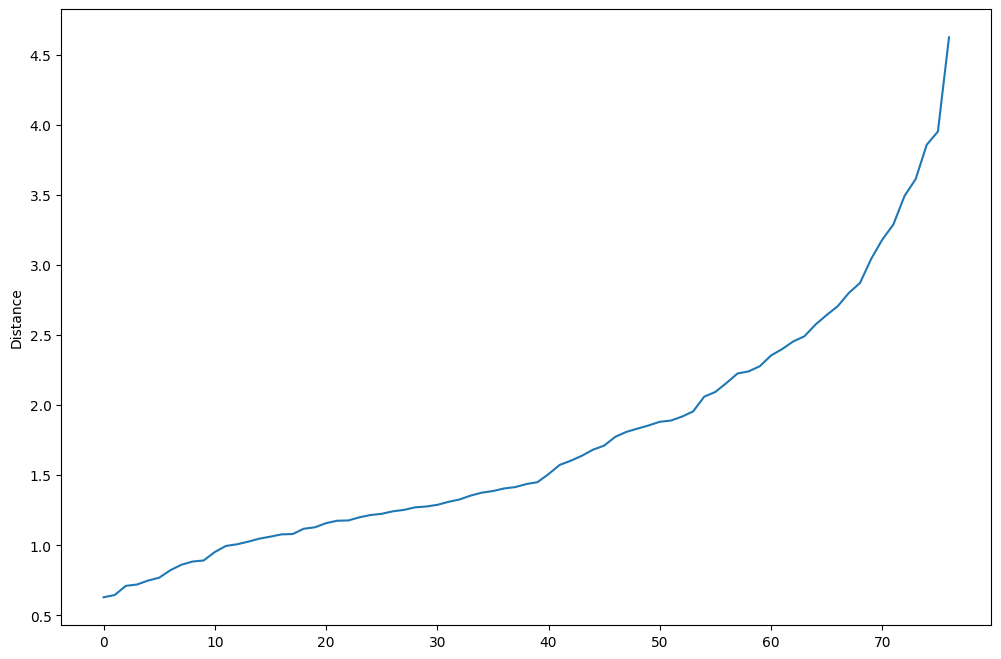

In [59]:
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.ylabel("Distance")

In [60]:
distances = distances[:] # Alternatively , you can take the distance of the nearest neighbour
distances

array([0.62968472, 0.64577091, 0.71125414, 0.72050141, 0.74879874,
       0.76923759, 0.82240133, 0.86156794, 0.88445486, 0.8920515 ,
       0.95236737, 0.995688  , 1.00744235, 1.02614295, 1.04769257,
       1.06199594, 1.07839112, 1.08067422, 1.11837721, 1.12877714,
       1.15813479, 1.17568724, 1.17732105, 1.19998571, 1.21613281,
       1.22481327, 1.24265955, 1.25278818, 1.27095321, 1.27681275,
       1.28872782, 1.31006249, 1.32701872, 1.35474847, 1.37578257,
       1.38720844, 1.40549542, 1.41525553, 1.43690169, 1.45038461,
       1.50792703, 1.5734874 , 1.60327257, 1.6389547 , 1.68207807,
       1.71099249, 1.77384342, 1.80911608, 1.83229654, 1.85505469,
       1.88112528, 1.88970623, 1.91806478, 1.95513236, 2.06041264,
       2.09401291, 2.15799527, 2.22602117, 2.24057631, 2.27782762,
       2.35367507, 2.39937475, 2.45409611, 2.49067597, 2.57432943,
       2.64228011, 2.70546631, 2.80009968, 2.87091388, 3.04204258,
       3.17976775, 3.28785107, 3.49086452, 3.61158749, 3.85664

## Robustness Analysis
**Silhouette Score**


*Sihouette Coefficient*: Evaluate how well the **compactness** and the **separation** of the clusters are.
(Note that the notation below is consistent with the above content.) Using *Sihouette Coefficient*, we can choose an optimal value for number of clusters.

***

$ a(x_i) $ denotes the **mean intra-cluster distance**. Evaluate the compactness of the cluster to which $x_i$ belongs. (The smaller the more compact)

$$ a(x_i) = \frac{ \sum_{x_k \in C_j ,\ k \neq i}{D(x_i, x_k)} }{\left\vert C_j \right\vert - 1} $$  

For the data point $x_i$, caculate its average distance to all the other data points in its cluster. (Minusing one in denominator part is to leave out the current data point $x_i$)

***

$ b(x_i) $ denotes the **mean nearest-cluster distance**. Evaluate how $x_i$ is separated from other clusters. (The larger the more separated)

$$ b(x_i) = \min_{C_j :\ 1 \leq j \leq k ,\ x_i \notin C_j} \left\{ \frac{ \sum_{x_k \in C_j}{D(x_i, x_k)} }{\left\vert C_j \right\vert } \right\} $$

For the data point $x_i$ and all the other clusters not containing $x_i$, caculate its average distance to all the other data points in the given clusters. Find the minimum distance value with respect to the given clusters. 

***

Finally, *Silhouette Coefficient*: $ s(x_i) = \displaystyle\frac{b(x_i) - a(x_i)}{\max\{a(x_i), b(x_i)\}},\ -1 \leq s(x_i) \leq 1 $. Want $a(x_i) \lt b(x_i)$ and $a(x_i) \to 0$ so as to $s(x_i) \to 1$.

In [61]:
from sklearn.metrics import silhouette_score

In [62]:
for n_cluster in range(2, 25):
    
    kmeans = KMeans(n_clusters = n_cluster, random_state = 38)
    kmeans.fit(cereals_std)
    
    label = kmeans.labels_
    
    sil_coeff = silhouette_score(cereals_std, label, metric='euclidean')
    
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.23709046607668913
For n_clusters=3, The Silhouette Coefficient is 0.212788194763878
For n_clusters=4, The Silhouette Coefficient is 0.2415870605802493
For n_clusters=5, The Silhouette Coefficient is 0.26840624322142453
For n_clusters=6, The Silhouette Coefficient is 0.29063541387889236
For n_clusters=7, The Silhouette Coefficient is 0.3151977818762371
For n_clusters=8, The Silhouette Coefficient is 0.3286843526613397
For n_clusters=9, The Silhouette Coefficient is 0.3425342395335024
For n_clusters=10, The Silhouette Coefficient is 0.3482538198979846
For n_clusters=11, The Silhouette Coefficient is 0.3613362640333242
For n_clusters=12, The Silhouette Coefficient is 0.31194731542632215
For n_clusters=13, The Silhouette Coefficient is 0.33243465885036144
For n_clusters=14, The Silhouette Coefficient is 0.34369272211542107
For n_clusters=15, The Silhouette Coefficient is 0.3271335287823829
For n_clusters=16, The Silhouette Coefficient is 0.

In [63]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [64]:
km = KMeans(n_clusters = 7, init = 'k-means++', n_init=10, 
            max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(cereals_std)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(cereals_std, y_km, metric='euclidean')

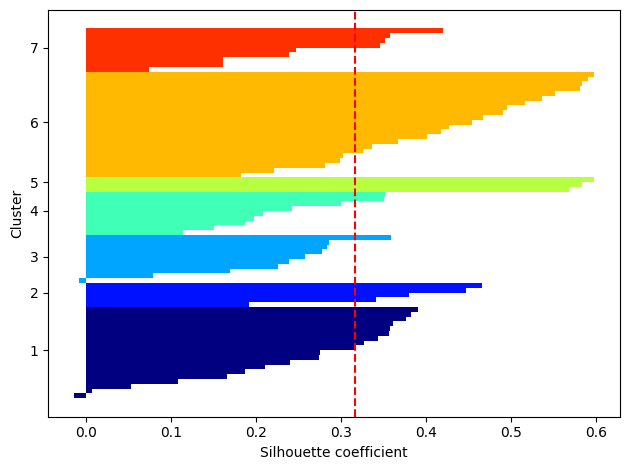

In [65]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()

##**CATEGORICAL VARIABLES**



In [66]:
# For Categorical Attributes
from scipy.spatial import distance

print(distance.hamming([1, 0, 0], [1, 0, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))
print(distance.jaccard([1, 0, 0], [0, 1, 1]))


0.0
0.5
0.6666666666666666
1.0
